<a href="https://colab.research.google.com/github/esramostafa20/Regression-Models-/blob/main/6_Elastic_Net_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. Elastic Net Regression
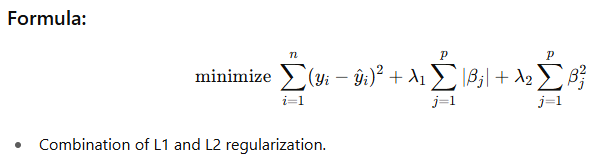

## When to use:
1. When you want balance between Ridge and Lasso benefits.

2. Good when features are correlated and you want feature selection.

## When not to use:
1. When you want simpler models like just Ridge or Lasso.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/final_student_data.csv")  # Or use any built-in dataset
df.head()

,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total'])  # or keep only relevant
y = df['total']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ElasticNetCV: tunes both alpha and l1_ratio
model = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.9],  # 0.1 = more like Ridge, 0.9 = more like Lasso
    alphas=[0.01, 0.1, 1.0, 10.0],
    cv=5,
    max_iter=10000)
model.fit(X_train, y_train)

ElasticNetCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5, l1_ratio=[0.1, 0.5, 0.9],
             max_iter=10000)

In [ ]:
# Predict and clip output
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("ElasticNet Regression Results:")
print("Best alpha:", elastic_net.alpha_)
print("Best l1_ratio:", elastic_net.l1_ratio_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

ElasticNet Regression Results:
Best alpha: 0.01
Best l1_ratio: 0.5
Mean Squared Error: 1621.4121361735358
R2 Score: 0.159584879206373


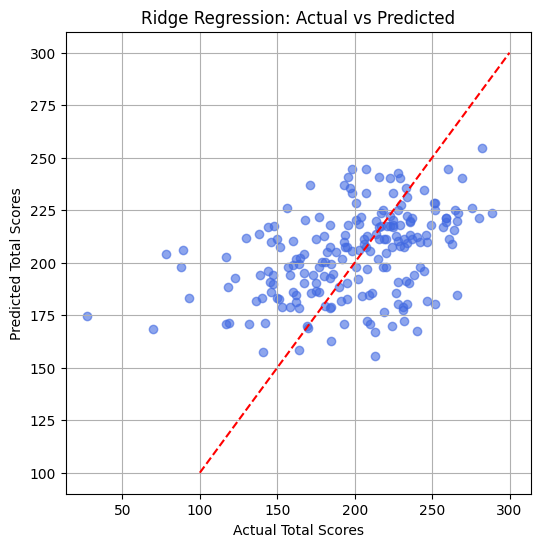

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([100, 300], [100, 300], 'r--')   # Diagonal line: perfect prediction
plt.xlabel("Actual Total Scores")
plt.ylabel("Predicted Total Scores")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

## Coefficient Plot (to see feature importance)

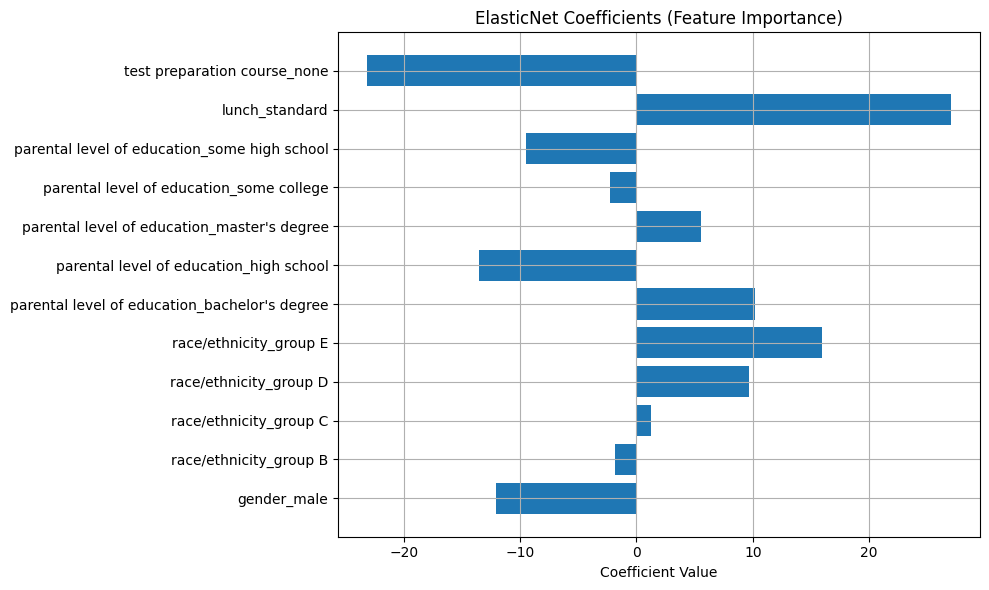

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, model.coef_)
plt.title("ElasticNet Coefficients (Feature Importance)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

## Each bar shows the coefficient (weight) of a feature in the ElasticNet regression model:

1. Longer bar → stronger influence

2. Positive value → increases predicted total score

3. Negative value → decreases predicted total score

4. Zero or missing bars → ElasticNet dropped that feature (it had no predictive power)